In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

In [4]:
data = pd.read_csv("/Users/jiaxiwang/Documents/20-Fall/ZTGG/project_titanic/train.csv", index_col = 0)

In [5]:
sns.__version__

'0.11.0'

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Total sample: 891 passengers

Age: range from 0.42 to 80, with mean of 29.69, or 30 years old.

Fare: range from free ticket to 512 pounds, average fare 32 pounds.

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
# add a column for deck

data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
data["Deck"] = data["Cabin"].str.slice(0,1)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [11]:
data["Deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

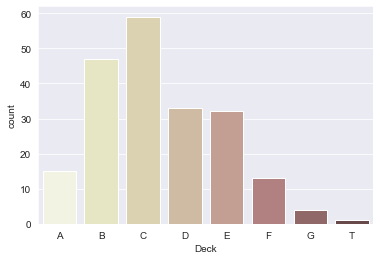

In [12]:
cls = sns.countplot(x = data["Deck"], data = data, 
                    order =['A','B','C','D','E','F','G','T'],palette= "pink_r")

From wiki page: 

deck A - first class recreational space and accommodation;
deck B - first and second class accommodations;
deck C - first class accommodation; *highest deck to run uninterrupted from bow to stern.
deck D - all three class cabins;
deck E - accommodations for all classes; 
deck F - second, third class and crew;
deck G - last level for passenger accommodation, mostly cargo spaces;
Tank Top - lowest level of ship, below waterline, facilities level. No passengers.

(https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic)


Looking at the data, most of the survivors with cabin numbers were from C cabin, then cabin B and D. The most logical hypothesis is that the structure of cabin C played a part in letting people run to the liftboat bacause it is the highest deck to run uninterrupted. Less people survived from the lower decks, which is possibly due to the short time to run to lifeboat when the bottom was hit. Deck A has less survivor potentially becuase there were less people occupying deck A. But the conclusion is questionable because only 204 samples has cabin on record, only ~23% of the entire dataset.

Gender:
In the dataset, there are 891 passengers, 577 male passengers and 314 female passengers. 

Age: 
Most of the passengers were in their 20’s. Second to this age group were the 30-years-old passengers. Out of all the passengers, 100 were children under 16 years old. 

Embarked:
Most of the passengers were embarked from port S, 168 passengers were from C port, and 77 passengers were embarked onto Titanic from port Q.

Class: 
There were 216 passengers belonged to first class, 184 passengers from second class, and 491 passengers from the third class on Titanic. 

In [13]:
survivor = data[data["Survived"]==1] 
# filter to a new dataframe with survived passengers only

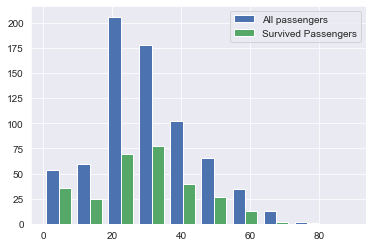

In [14]:
# compare the survivor age to all passengers age

plt.figure(1)

plt.style.use('seaborn-deep')

all_passenger = data["Age"]
survived = survivor["Age"]


plt.hist([all_passenger, survived], bins=10, range = [0,90], label=["All passengers","Survived Passengers"])
plt.legend(loc='upper right')
plt.show()

/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


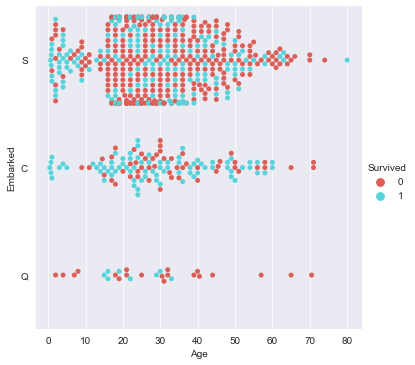

In [15]:
sns.catplot(x="Age",y = "Embarked", data = data, 
            kind="swarm",hue="Survived",palette="hls")

From the total vs. survived age plot:

1. The biggest age group on Titanic was in the 30-years-old range, second age group was the 20's age group. 
2. Passengers under 20 were roughly even.
3. Passengers passed the 30's age range has a sharp drop to less than half of the 30's and a steady decrease in number of passengers from 40 to 80 age group.

From the age vs. embarked plot:
1. More younger children embarked from Port S than from Port C & Q, this is due to to more adult passengers embarked from Port S.
2. Passenger age behaves similar to demographic structure for Port S & C, not enough passenger data to observe the pattern. 
3. The survived vs non-survived dots show that more younger children (under age 10) were able to survive, most of the passengers age between 10 to 20 years old embarked from Port S did not survive.

In [16]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
survival_ratio = 342/891*100

survival_ratio

38.38383838383838

<AxesSubplot:xlabel='Survived', ylabel='count'>

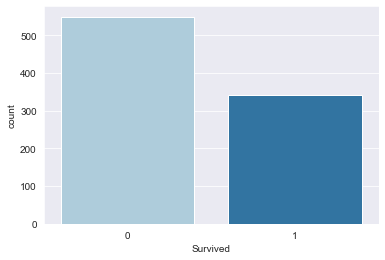

In [18]:
# non-survived vs survived

sns.countplot(x = data["Survived"], 
              data = data, palette = "Paired")

# the survival rate is 38.38%. In total of 891 passengers, only 342 people survived.

In [19]:
# gender comparison

data["Sex"].unique()

array(['male', 'female'], dtype=object)

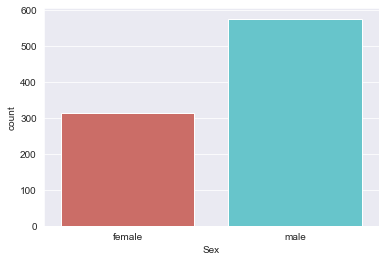

In [20]:
sns.countplot(x = data["Sex"], data = data, 
              palette = "hls",order = ["female","male"])
plt.show()

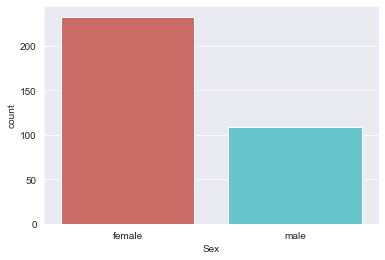

In [21]:
sns.countplot(x = survivor["Sex"], data = data, 
              palette = "hls")
plt.show()

In [22]:
survivor["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [23]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
sur_fem = 233/314*100

sur_fem

74.20382165605095

In [25]:
sur_mal = 109/577*100

sur_mal

18.890814558058924

From a total of 891 passengers, 342 people survived, and among them, 233 were females. 

By comparing the survived/total ratio between male and female, we can see that over 74.2% of
women on Titanic were survived, whereas only 18.89% of man survived from this horrific event.

In [26]:
child = data[data["Age"]<= 16]

child.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.00,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.55,2.610000,8.006700,1.570000,1.140000,31.588877
std,0.50,0.649709,5.634042,1.653005,0.765678,31.882021
min,0.00,1.000000,0.420000,0.000000,0.000000,7.225000
25%,0.00,2.000000,3.000000,0.000000,1.000000,14.488550
50%,1.00,3.000000,7.500000,1.000000,1.000000,26.000000
75%,1.00,3.000000,14.000000,3.000000,2.000000,34.375000
max,1.00,3.000000,16.000000,5.000000,3.000000,211.337500


In [27]:
data["Person"] = data[["Sex","Age"]].apply(
    lambda x: "child" if x[1] < 16 else x[0], axis=1)

In [28]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Person
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,male


In [29]:
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
Deck         True
Person      False
dtype: bool

In [30]:
data.drop(["Sex", "Cabin"], axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Person
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,male


male      537
female    271
child      83
Name: Person, dtype: int64

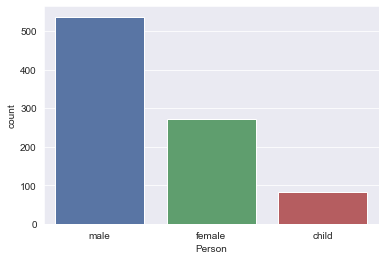

In [31]:
sns.countplot(x = data["Person"])

data["Person"].value_counts()

The composition of passengers: 537 are male, 271 are female, 83 passengers under age of 16.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

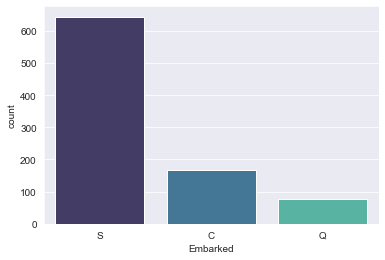

In [32]:
sns.countplot(x = data["Embarked"],palette="mako")

data["Embarked"].value_counts()

Most of the passengers were embarked from port S, 168 passengers were from C port, and 77 passengers were embarked onto Titanic from port Q.

3    491
1    216
2    184
Name: Pclass, dtype: int64

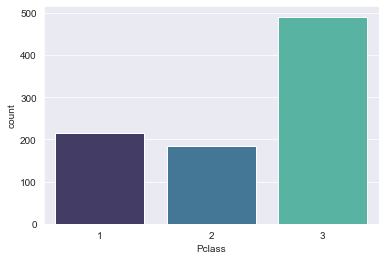

In [33]:
sns.countplot(x = data["Pclass"],palette="mako")

data["Pclass"].value_counts()

<AxesSubplot:xlabel='Deck', ylabel='count'>

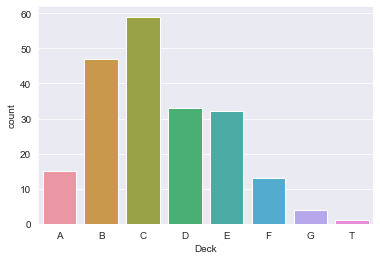

In [34]:
# A distribution of the deck column

sns.countplot(x=data["Deck"], 
              order=['A','B','C','D','E','F','G','T'] )

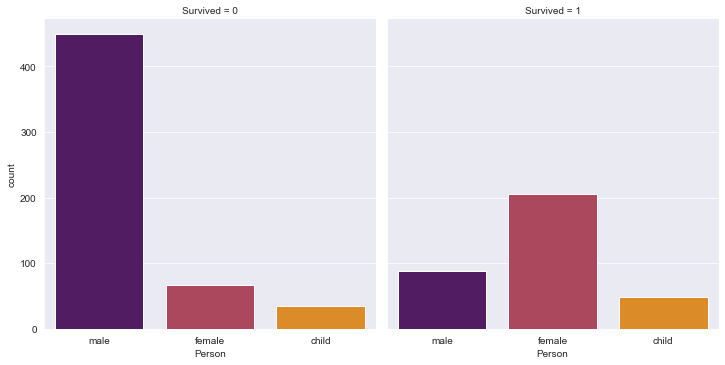

In [35]:
#sns.FacetGrid(data, col="", row ="Survived")

sns.catplot(x="Person", col="Survived", 
            data= data, kind="count",palette="inferno") 

From this side-by-side graph we can see that, there were far more female survived than male survived on Titanic. A slightly more children under 16 years old were saved than not saved.

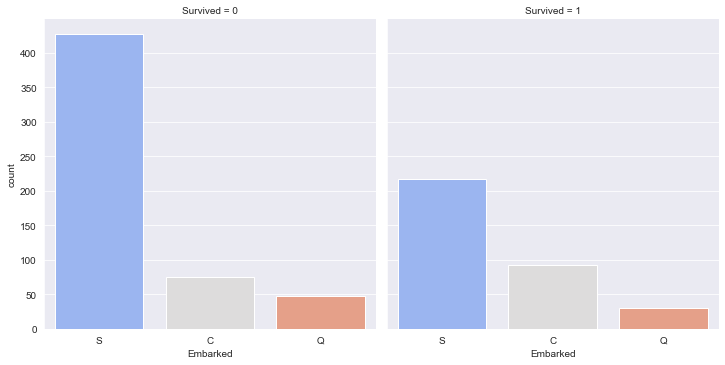

In [36]:
sns.catplot(x="Embarked", col="Survived", 
            data= data, kind="count", palette = "coolwarm")

Relatively more passengers from Port C survived than not survived, less people from Port S survived than not survived. 

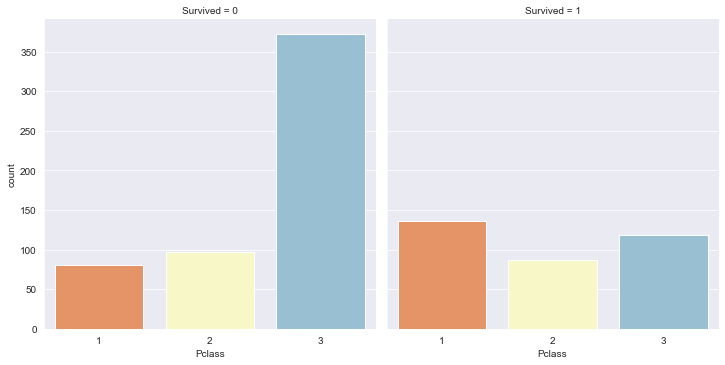

In [37]:
sns.catplot(x="Pclass", col="Survived", 
            data= data, kind="count", palette = "RdYlBu")

From the above graphs we can see that more first-class passengers survived than not survive. Second class passengers had approximately half survived, whereas, a huge portion of third-class passengers did not survive. The reason behind this is potentially due to the accessibility to lifeboat. First and second class passengers may be closer to life boat when the Titanic hit the iceberg, and that third class passengers were closer to the bottom of the cruise therefore less chance of getting to the life boat before the water reached their cabins.

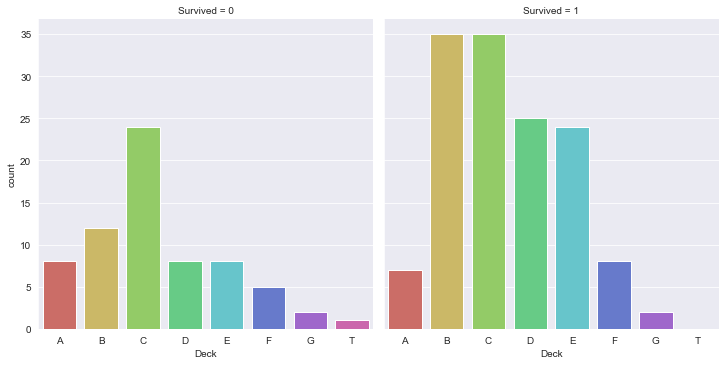

In [38]:
sns.catplot(x="Deck", col="Survived", data= data, 
            kind="count", palette = "hls", 
            order=['A','B','C','D','E','F','G','T'] )

From this side-by-side comparison between survived passengers from not-survived passengers, the deck of the passengers played an important role in their survival from the crash. More people from Deck B, C, D, E survived than not-survive. No passengers survived from the bottom level of the cruise, this could be caused by the fact that water rushed into the bottom before anyone from the Deck T could run away. Half of the passengers from Deck A survived, potential explanation could be that they had difficulty running down to the sea-level decks, the height from Deck A to the surface of the sea could play a vital factor in passenger survival as well. 



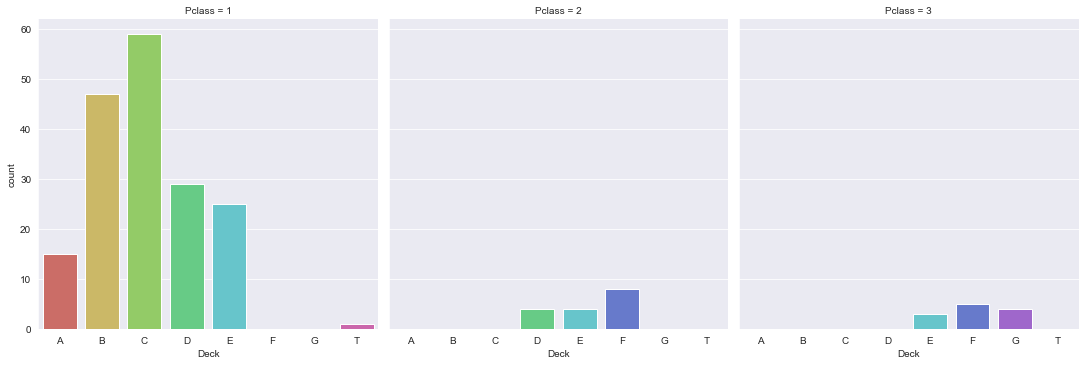

In [39]:
sns.catplot(x="Deck", col="Pclass", data= data, 
            kind="count", palette = "hls", 
            order=['A','B','C','D','E','F','G','T'] )

All first class passengers were from Deck A through E, with the majority belong to Deck C, none of the first class passengers were from Deck F and G. 

Second class passengers: a small number of second class passengers were from Deck D through F, none of the second class passengers were from Deck A through C, where most of the first class passengers were. Recall that most of the surived passengers were from Deck C, meaning that most of the survivors were first class passengers.

Third class passengers: all of the third class passengers were from Deck E, E and G. None of the third class passengers were from Deck A through D. 



In [40]:
data.head()
data.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
Deck         True
Person      False
dtype: bool

In [41]:
# find passengers family

data["family"] = data[["SibSp","Parch"]].apply(
    lambda p: p[0]+p[1], axis=1)

data["family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [42]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Person,family
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,male,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,female,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,female,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,female,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,male,0


In [43]:
cln = data.drop(["SibSp","Parch","Cabin"], axis=1)
cln.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Deck,Person,family
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,NaN,male,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,female,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,NaN,female,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,C,female,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,NaN,male,0


/Users/jiaxiwang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family', ylabel='Density'>

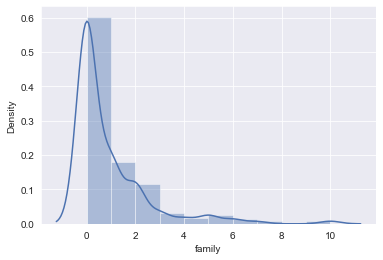

In [44]:
sns.distplot(data['family'],bins = 10)

In [45]:
size = data["family"].value_counts()

size

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

In [46]:
percent= (size/891)*100
percent

0     60.269360
1     18.069585
2     11.447811
3      3.254770
5      2.469136
4      1.683502
6      1.346801
10     0.785634
7      0.673401
Name: family, dtype: float64

In [47]:
data[data['family']==10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Person,family
PassengerId,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,male,10
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,female,10
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,male,10
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,male,10
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,female,10
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,male,10
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,female,10


In [48]:
data[data['family']==7]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Person,family
PassengerId,,,,,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,NaN,child,7
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,NaN,female,7
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,NaN,child,7
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,NaN,child,7
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,NaN,female,7
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,NaN,child,7


Majority of the passengers traveled alone (60.27%),  18% of the passengers were accompanied by one, 10% had two other family members. There were some families with over 5 people on the cruise, among them, one particular family of 2 parents with 8 children from third class were on the cruise. No age data available to see if all the children were under age of 16 because none of them were survived from the Titanic crash. Another fmaily of seven from third class also did not survive. A hypothesis is that parents had a hard time getting all of their children to run when the water hit their cabins.

<AxesSubplot:xlabel='Pclass', ylabel='family'>

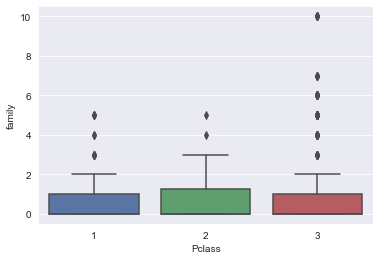

In [49]:
sns.boxplot(x='Pclass',y = 'family',data = data)

In [50]:
corr = cln.corr()
print(corr)

          Survived    Pclass       Age      Fare    family
Survived  1.000000 -0.338481 -0.077221  0.257307  0.016639
Pclass   -0.338481  1.000000 -0.369226 -0.549500  0.065997
Age      -0.077221 -0.369226  1.000000  0.096067 -0.301914
Fare      0.257307 -0.549500  0.096067  1.000000  0.217138
family    0.016639  0.065997 -0.301914  0.217138  1.000000


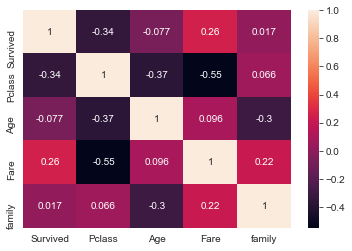

In [51]:
sns.heatmap(corr, annot=True)
plt.show()

After analyzing some of the factors and run a correlation heat map among some of the numeric factors, we can see that fare has a positive correlation with survival, meaning that the more a passenger paid on their ticket onboard, the more likely they would have survived from the crash. Another correlation for fare is that fare is negatively correlated with class (-0.55), but positively correlated with family size (0.22). 

The negative correlation between age and survival proves what we see earlier, that more children would survive as opposed to adults, more specifically male adults. Therefore, correlation coefficient of -0.077 means that as age increases, the chance of survival would go down. 

An interesting result that class is negatively correlated with chance of survival reveals that  there could be far less first class passengers than third class passengers.

In [52]:
#---------------------- END OF DATA ANALYSIS ----------------------#

In [53]:
# Machine Learning Try-Out

# import test data for this purpose
test = pd.read_csv("/Users/jiaxiwang/Documents/20-Fall/ZTGG/project_titanic/test.csv", index_col = 0)

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [54]:
# data cleaning

# create Person column to get rid of sex and identify children under 16.

test["Person"] = test[["Sex","Age"]].apply(
    lambda x: "child" if x[1] < 16 else x[0], axis=1)

# Drop irrelevant data for modeling
t1 = test.drop(['Name','Sex','SibSp',
                'Parch','Ticket','Cabin'], axis=1)

# Change the order of test data
t1 = t1[['Survived','Pclass','Age','Fare',
         'Embarked','Person']]

t1.head()

,Survived,Pclass,Age,Fare,Embarked,Person
PassengerId,,,,,,
892,0,3,34.5,7.8292,Q,male
893,1,3,47.0,7.0000,S,female
894,0,2,62.0,9.6875,Q,male
895,0,3,27.0,8.6625,S,male
896,1,3,22.0,12.2875,S,female


In [55]:
# data cleaning
clean = cln.drop(["Deck","Name","Sex","Ticket",
                  "family"], axis=1) 
# Drop irrelevant data for modeling

clean.head()

,Survived,Pclass,Age,Fare,Embarked,Person
PassengerId,,,,,,
1,0,3,22.0,7.2500,S,male
2,1,1,38.0,71.2833,C,female
3,1,3,26.0,7.9250,S,female
4,1,1,35.0,53.1000,S,female
5,0,3,35.0,8.0500,S,male


In [56]:
clean.info() # check where the data needs to be filled or dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Person    891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 88.7+ KB


In [57]:
# combine test and training data for ML

frames = [clean, t1]

all_data = pd.concat(frames)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Age       1046 non-null   float64
 3   Fare      1308 non-null   float64
 4   Embarked  1307 non-null   object 
 5   Person    1309 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 71.6+ KB


In [58]:
all_data["Age"] = all_data["Age"].fillna(
    all_data["Age"].mean()) 
# fill age missing values with mean

all_data.dropna(inplace = True) 
# drop the two entries with NaN values

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Age       1306 non-null   float64
 3   Fare      1306 non-null   float64
 4   Embarked  1306 non-null   object 
 5   Person    1306 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 71.4+ KB


In [59]:
from sklearn.preprocessing import OneHotEncoder

X = all_data.select_dtypes(include=[object])
X.head()

,Embarked,Person
PassengerId,,
1,S,male
2,C,female
3,S,female
4,S,female
5,S,male


In [60]:
X.shape

(1306, 2)

In [61]:
enc = OneHotEncoder() #Encode the "Person" and "Embarked" features

enc.fit(X)

ohelabels = enc.transform(X).toarray()

ohelabels.shape

(1306, 6)

In [62]:
all_data.reset_index(drop=True, inplace=True)

In [63]:
newdata = pd.concat([all_data,pd.DataFrame(ohelabels)],axis=1,)
newdata.head()

,Survived,Pclass,Age,Fare,Embarked,Person,0,1,2,3,4,5
0,0,3,22.0,7.2500,S,male,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,71.2833,C,female,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,7.9250,S,female,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,35.0,53.1000,S,female,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,35.0,8.0500,S,male,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
newdata.isnull().any() 
# check if there is any missing values before dropping Embarked and Person

Survived    False
Pclass      False
Age         False
Fare        False
Embarked    False
Person      False
0           False
1           False
2           False
3           False
4           False
5           False
dtype: bool

In [65]:
newdata = newdata.drop(['Embarked','Person'], axis=1)

In [66]:
#newdata.drop(["Embarked","Person"],axis=1,inplace=True) 
newdata.columns = ['Survived','Pclass','Age',
                   'Fare','Embarked_C','Embarked_Q',
                   'Embarked_S','Child','Female','Male']
newdata.head()

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Child,Female,Male
0,0,3,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,35.0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
X = newdata.iloc[:,newdata.columns != "Survived"]
y = newdata.iloc[:,newdata.columns == "Survived"]

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [69]:
Xtrain.index = range(Xtrain.shape[0])

In [70]:
Xtrain.head()

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Child,Female,Male
0,3,29.881138,14.4542,1.0,0.0,0.0,0.0,0.0,1.0
1,1,56.000000,26.5500,0.0,0.0,1.0,0.0,0.0,1.0
2,2,40.000000,26.0000,0.0,0.0,1.0,0.0,0.0,1.0
3,3,0.750000,13.7750,0.0,0.0,1.0,1.0,0.0,0.0
4,3,29.881138,7.7500,0.0,1.0,0.0,0.0,0.0,1.0


In [71]:
# Decision Tree

cls = DecisionTreeClassifier(random_state=42,max_depth=4)
cls = cls.fit(Xtrain, Ytrain)
score = cls.score(Xtest,Ytest)

score

0.8571428571428571

In [72]:
# Apply grid-search cross-validation

parameters = {"max_depth":[*range(1,10)]}

cls = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(cls, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
GS.best_params_


{'max_depth': 3}

In [73]:
GS.best_score_ 
# find the best score associated with the parameters

0.872013855709508

In [74]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc = rfc.fit(Xtrain, Ytrain.values.ravel())
score2 = rfc.score(Xtest, Ytest)

score2  # check random forest performance

0.826530612244898

In [75]:
rFI = rfc.feature_importances_  
# each feature's importance in the random forest model. 

feature = newdata.columns[1:]

for num, name in zip(rFI,feature):
        print("{} feature importance is: {}".format(name,round(num,4)))

Pclass feature importance is: 0.0623
Age feature importance is: 0.2101
Fare feature importance is: 0.247
Embarked_C feature importance is: 0.0095
Embarked_Q feature importance is: 0.0053
Embarked_S feature importance is: 0.0119
Child feature importance is: 0.0066
Female feature importance is: 0.1529
Male feature importance is: 0.2944


From this analysis we can see that with Random Forest classifier, the most important feature to determine a passenger's chance of suvival is fare, then male, age, and other features. Surprisingly, contrary to what we observed earlier with plots that class is not highly associated with survival, neither was child. 

In [76]:
y = y.values.ravel()

In [86]:
# cross validation for decision tree and random forest

from sklearn.model_selection import cross_val_score

cls = DecisionTreeClassifier()

cls_s = cross_val_score(cls, X, y, cv=100)

cls_s

array([0.85714286, 0.85714286, 0.71428571, 0.71428571, 0.92857143,
       0.85714286, 0.76923077, 0.92307692, 0.76923077, 0.61538462,
       0.92307692, 0.92307692, 0.84615385, 0.84615385, 0.76923077,
       0.69230769, 0.92307692, 0.61538462, 0.61538462, 0.61538462,
       0.92307692, 0.61538462, 0.61538462, 0.84615385, 1.        ,
       0.69230769, 0.84615385, 0.92307692, 0.92307692, 0.92307692,
       0.92307692, 0.76923077, 0.69230769, 0.92307692, 0.76923077,
       0.76923077, 0.61538462, 0.53846154, 0.92307692, 0.69230769,
       0.76923077, 0.84615385, 1.        , 0.84615385, 0.76923077,
       0.69230769, 1.        , 0.76923077, 0.92307692, 0.92307692,
       0.76923077, 0.76923077, 0.76923077, 0.61538462, 0.84615385,
       0.84615385, 0.84615385, 0.76923077, 0.92307692, 0.76923077,
       0.84615385, 0.84615385, 0.84615385, 0.84615385, 0.69230769,
       0.84615385, 0.84615385, 0.92307692, 0.69230769, 0.84615385,
       0.76923077, 0.92307692, 0.61538462, 0.92307692, 1.     

In [87]:
rfc = RandomForestClassifier()

rfc_s = cross_val_score(rfc,X,y,cv=100)

rfc_s

array([1.        , 0.85714286, 0.71428571, 0.85714286, 0.85714286,
       1.        , 0.84615385, 0.92307692, 0.84615385, 0.69230769,
       0.92307692, 0.92307692, 0.92307692, 0.69230769, 0.92307692,
       0.69230769, 0.92307692, 0.61538462, 0.69230769, 0.69230769,
       0.76923077, 0.69230769, 0.84615385, 0.76923077, 1.        ,
       0.76923077, 0.69230769, 0.92307692, 0.76923077, 0.92307692,
       0.84615385, 0.76923077, 0.76923077, 0.92307692, 0.92307692,
       1.        , 0.61538462, 0.61538462, 0.84615385, 0.69230769,
       0.76923077, 0.76923077, 1.        , 0.84615385, 0.69230769,
       0.76923077, 0.92307692, 0.76923077, 0.76923077, 1.        ,
       0.69230769, 0.69230769, 0.76923077, 0.61538462, 0.76923077,
       0.92307692, 0.84615385, 0.76923077, 0.92307692, 0.61538462,
       0.84615385, 0.92307692, 0.84615385, 0.92307692, 0.61538462,
       0.84615385, 0.84615385, 0.92307692, 0.84615385, 0.84615385,
       1.        , 1.        , 0.69230769, 0.92307692, 1.     

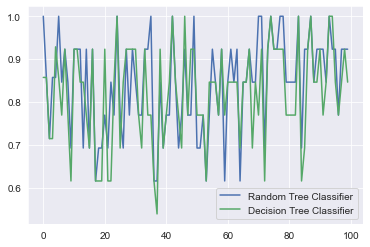

In [88]:
plt.plot(rfc_s, label = "Random Tree Classifier")
plt.plot(cls_s, label = "Decision Tree Classifier")
plt.legend()
plt.show()

In [89]:
# average performence of the two models

m_cls = round(cls_s.mean(),4)
m_rfc = round(rfc_s.mean(),4)

print("Decision Tree: {} Random Forest: {}".format(m_cls,m_rfc))

Decision Tree: 0.8208 Random Forest: 0.8436


In [81]:
GP_free = pd.read_csv('/Users/jiaxiwang/Downloads/ISYS812 Final_Exam data/gp_store_free.csv')
GP_free

,App,Category,Rating,Reviews,Size,Content Rating,Genre,Last Updated
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,Everyone 10+,Health & Fitness,17-Feb-17
1,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,Everyone,Education,3-Jul-14
2,100 Doors of Revenge,FAMILY,4.1,105766,48M,Teen,Puzzle,24-May-18
3,100+ C Programs,FAMILY,4.2,20,1.6M,Everyone,Education,3-Jan-17
4,"100000+ Messages - DP, Status, Jokes & GIF 2018",LIFESTYLE,3.7,121,3.8M,Mature 17+,Lifestyle,29-Dec-17
...,...,...,...,...,...,...,...,...
8169,Zoopla Property Search UK - Home to buy & rent,LIFESTYLE,4.1,21195,Varies with device,Everyone,Lifestyle,22-Jun-18
8170,Zowi App,FAMILY,4.5,516,21M,Everyone,Education,21-Dec-16
8171,ZUL - Rotativo Digital BH,AUTO_AND_VEHICLES,4.2,29,Varies with device,Everyone,Auto & Vehicles,1-Aug-18
8172,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,4.5,28560,Varies with device,Everyone,Shopping,23-Jul-18


It is hard to say which model outperformed the other one, random forest classifier or decision tree classifier, on predicting who will survive from the Titanic crush (mean). They both exhibit the same pattern when cross-validating. Random forest classifier did outperform decision tree towards the end, but decision tree classifier catches up close to random tree forest classifier at the end. Random forest does have a slightly higher mean from cross-validation.